In [2]:
import gensim.downloader as api

# Load Google's pre-trained Word2Vec model.
model = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


w1: happy, w2: joyful (Synonym), w3: sad (Antonym), Difference in Cosine Distances: 0.1116417944431305


ValueError: perplexity must be less than n_samples

In [33]:
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import gensim.downloader as api

# Load a pre-trained model
# model = api.load('word2vec-google-news-300')


# calc all distances and visualize
def find_example(model):
    w1 = "happy"
    synonyms = ["joyful", "cheerful", "merry", "ecstatic", "content", "thrilled"]
    antonyms = ["sad", "unhappy", "miserable", "depressed", "sorrowful", "gloomy"]

    # Initialize variables to store the best example
    best_synonym = None
    best_antonym = None
    min_diff = float('inf')  # Large initial value
    cos_dist_syn = []
    cos_dist_ant = []
    # Loop through possible synonyms and antonyms
    for syn in synonyms:
        cos_dist_syn1 = cosine(model[w1], model[syn])
        cos_dist_syn.append(cos_dist_syn1)
    for ant in antonyms:
        cos_dist_ant1 = cosine(model[w1], model[ant])
            # append all distances
        cos_dist_ant.append(cos_dist_ant1)
            
            
    return w1, synonyms, antonyms, cos_dist_syn, cos_dist_ant


w1, synonyms, antonyms, cos_dist_syn, cos_dist_ant = find_example(model)

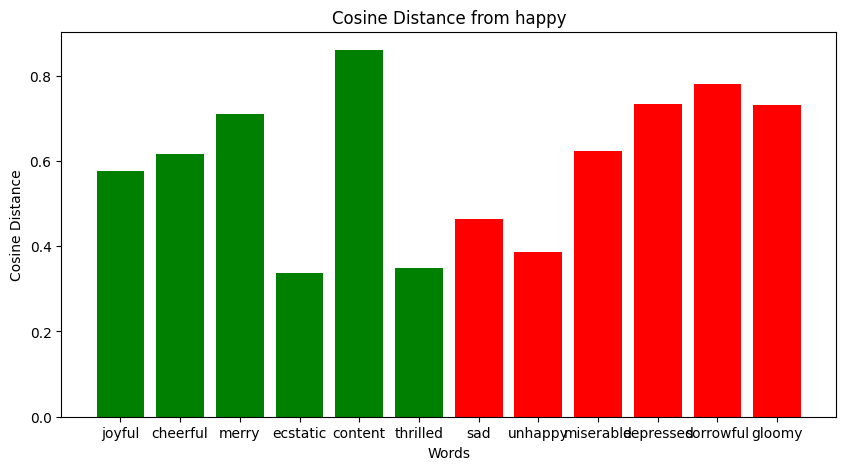

In [35]:
_ant = find_example(model)
# Visualize the distances
# add labels
# make dictionaries
synonyms_dict = dict(zip(synonyms, cos_dist_syn))
antonyms_dict = dict(zip(antonyms, cos_dist_ant))
# now plot by extending the plot function
def plot(w1, synonyms_dict, antonyms_dict):
    plt.figure(figsize=(10, 5))
    plt.bar(synonyms_dict.keys(), synonyms_dict.values(), color='g')
    plt.bar(antonyms_dict.keys(), antonyms_dict.values(), color='r')
    plt.xlabel('Words')
    plt.ylabel('Cosine Distance')
    plt.title(f'Cosine Distance from {w1}')
    plt.show()
plot(w1, synonyms_dict, antonyms_dict)

In [32]:
len(cos_dist_syn)

12

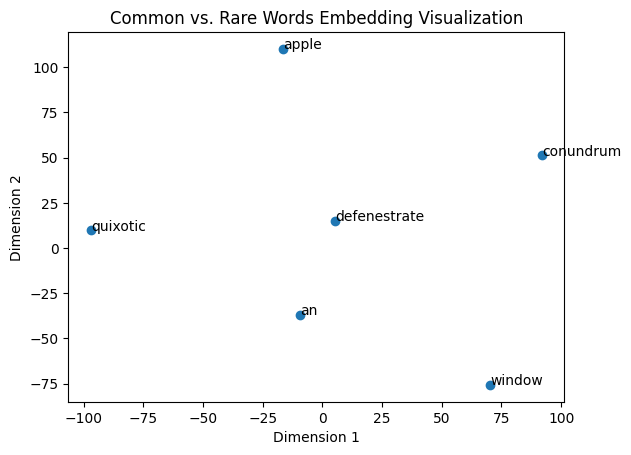

Distance between 'an' and 'quixotic': 0.8523
Distance between 'an' and 'defenestrate': 0.9517
Distance between 'an' and 'apple': 1.0502
Distance between 'an' and 'window': 0.8348
Distance between 'an' and 'conundrum': 0.9184


In [17]:

def compare_words(model, common_word, rare_words):
    distances = []
    word_vectors = [model[common_word]]  # Start with the common word vector

    # Calculate cosine distances and collect vectors
    for word in rare_words:
        if word in model:
            distance = cosine(model[common_word], model[word])
            distances.append((word, distance))
            word_vectors.append(model[word])
        else:
            print(f"Word '{word}' not in vocabulary.")

    # Convert list of vectors to numpy array
    word_vectors = np.array(word_vectors)
    return distances, word_vectors

# Example rare words and a common word
common_word = 'an'
rare_words = ['quixotic', 'defenestrate', 'apple', 'window','conundrum']

# Get distances and word vectors
distances, word_vectors = compare_words(model, common_word, rare_words)

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=2, learning_rate='auto')
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot the words
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for i, word in enumerate([common_word] + rare_words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Common vs. Rare Words Embedding Visualization')
plt.show()

# Print distances
for word, distance in distances:
    print(f"Distance between '{common_word}' and '{word}': {distance:.4f}")